<a href="https://colab.research.google.com/github/DineshChopra/AI-ML/blob/master/TensorFlow/Udacity/5_Exercise_Flowers_With_Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Flowers Image Classification using tf.keras

## Importing Packages

In [2]:
import os
import numpy as np
import glob
import shutil
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

## Data Loading

In [5]:
_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

zip_file = tf.keras.utils.get_file(
    origin = _URL,
    fname = "flower_photos.tgz",
    extract = True
)

base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 1s 0us/step


The dataset we downloaded contains images of 5 types of flowers:

1. Rose
2. Daisy
3. Dandelion
4. Sunflowers
5. Tulips

So, let's create the labels for these 5 classes: 

In [6]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

## Segregate Training data and validation data

In [9]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))

  num_train = int(round(len(images)*0.8))
  train, val = images[:num_train], images[num_train:]

  # Segregate images into training set
  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  # Segregate images into validation set
  for t in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(t, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [10]:
round(len(images) * 0.8)

639

In [11]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [12]:
print('train_dir : {}'.format(train_dir))
print('val_dir : {}'.format(val_dir))

train_dir : /root/.keras/datasets/flower_photos/train
val_dir : /root/.keras/datasets/flower_photos/val


## Data Augmentation

In [13]:
batch_size = 100
IMG_SHAPE = 150

In [17]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    width_shift_range = .15,
    height_shift_range = .15,
    horizontal_flip = True,
    zoom_range = 0.5
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode = 'sparse'
)

Found 2935 images belonging to 5 classes.


In [19]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()


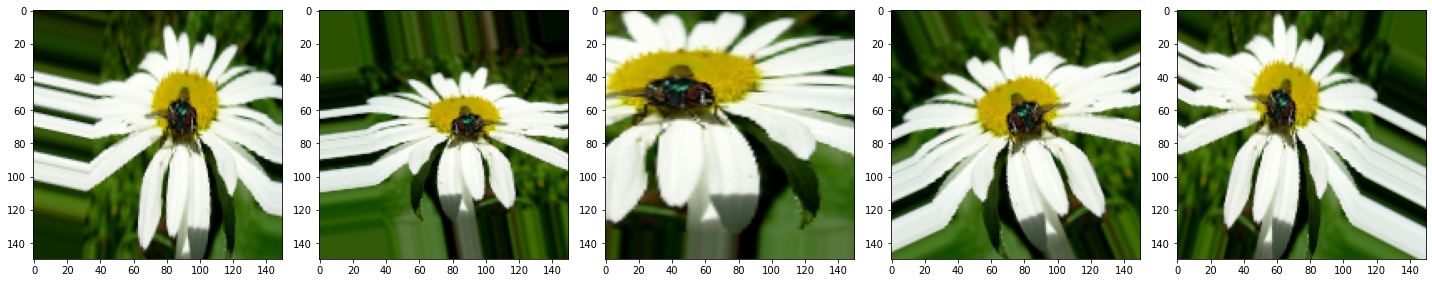

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

## Create data generator for the validation set

In [23]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(
    batch_size = batch_size,
    directory = val_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    class_mode = 'sparse'
)

Found 735 images belonging to 5 classes.


## Create CNN Model

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(16, 3, activation='relu', input_shape=(IMG_SHAPE, IMG_SHAPE, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(512, activation='relu'),

  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(5, activation='softmax')
])

## Compile the Model

In [27]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['accuracy']
)

## Train the Model

In [ ]:
epochs = 80

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch = int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs = epochs,
    validation_data = val_data_gen,
    validation_steps = int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/80
30/30 [==============================] - 21s 698ms/step - loss: 1.6602 - accuracy: 0.2446 - val_loss: 1.6599 - val_accuracy: 0.2449
Epoch 2/80
18/30 [=================>............] - ETA: 7s - loss: 1.6530 - accuracy: 0.2519

## Plot Training and Validation Graphs

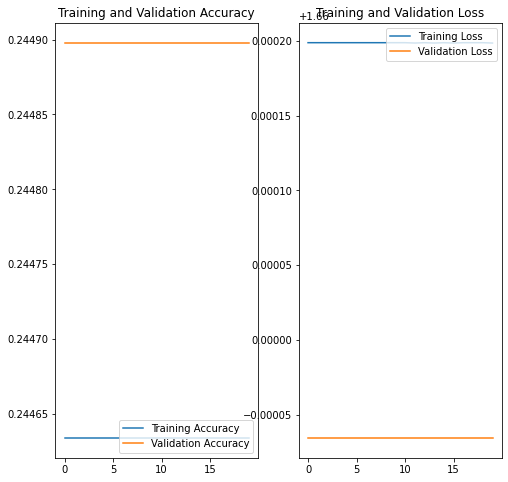

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize = (8,8))

plt.subplot(1, 2, 1)
plt.title('Training and Validation Accuracy')
plt.plot(epochs_range, acc, label = 'Training Accuracy')
plt.plot(epochs_range, val_acc, label = 'Validation Accuracy')
plt.legend(loc = 'lower right')

plt.subplot(1, 2, 2)
plt.title('Training and Validation Loss')
plt.plot(epochs_range, loss, label = 'Training Loss')
plt.plot(epochs_range, val_loss, label = 'Validation Loss')
plt.legend(loc = 'upper right')

plt.show()